# exploracion.ipynb — Análisis exploratorio (EDA)

Este notebook contiene un análisis exploratorio del dataset `data/diabetes.csv`.
Incluye: inspección inicial, estadísticas descriptivas, distribuciones, detección de outliers,
matriz de correlación y comparaciones de variables con respecto a la variable objetivo `Outcome`.


Directorio actual: c:\Archivos_de_trabajos\Portafolio-IA-Python\02_Proyectos_datosclásicos\2.-VisualEstudioCode\2.1.-Prediccion_riesgo_diabetes\notebooks
Dimensiones del dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1



Información y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Valores nulos por columna:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Estadísticas básicas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


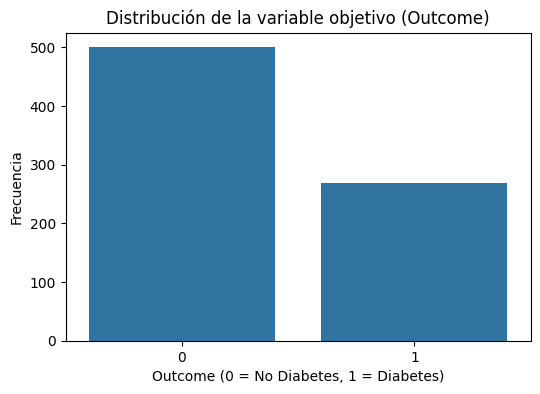

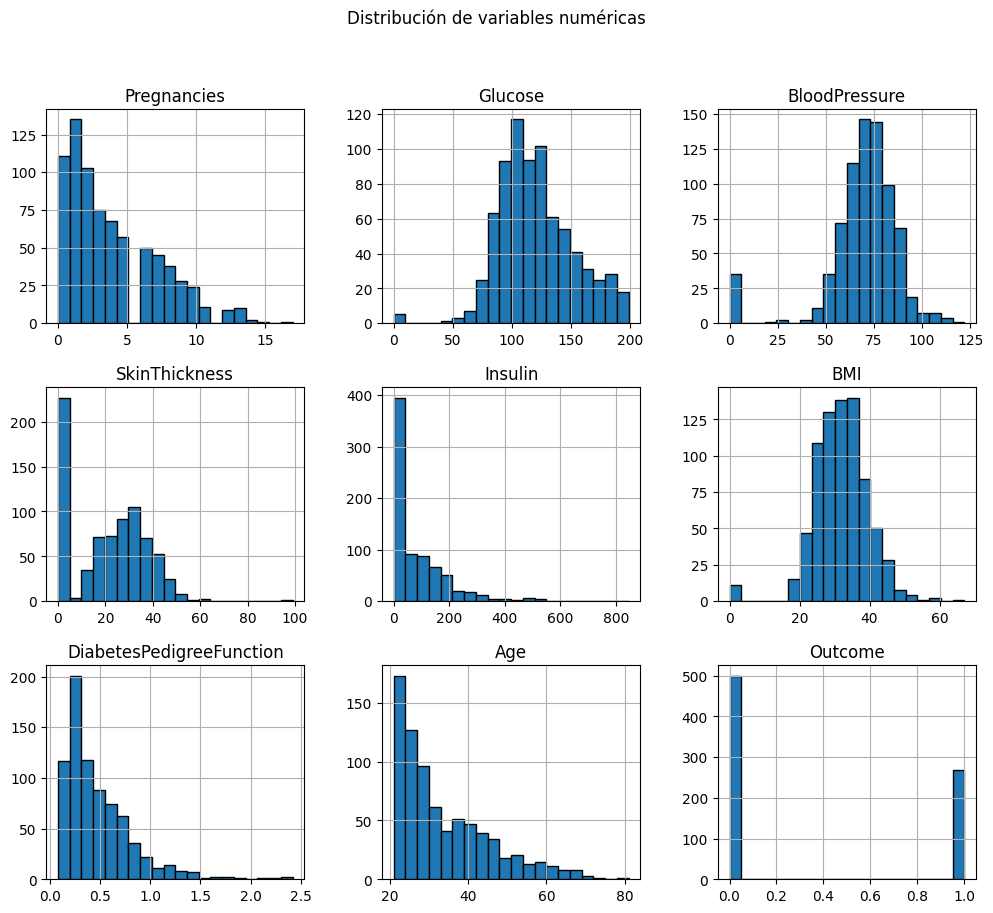

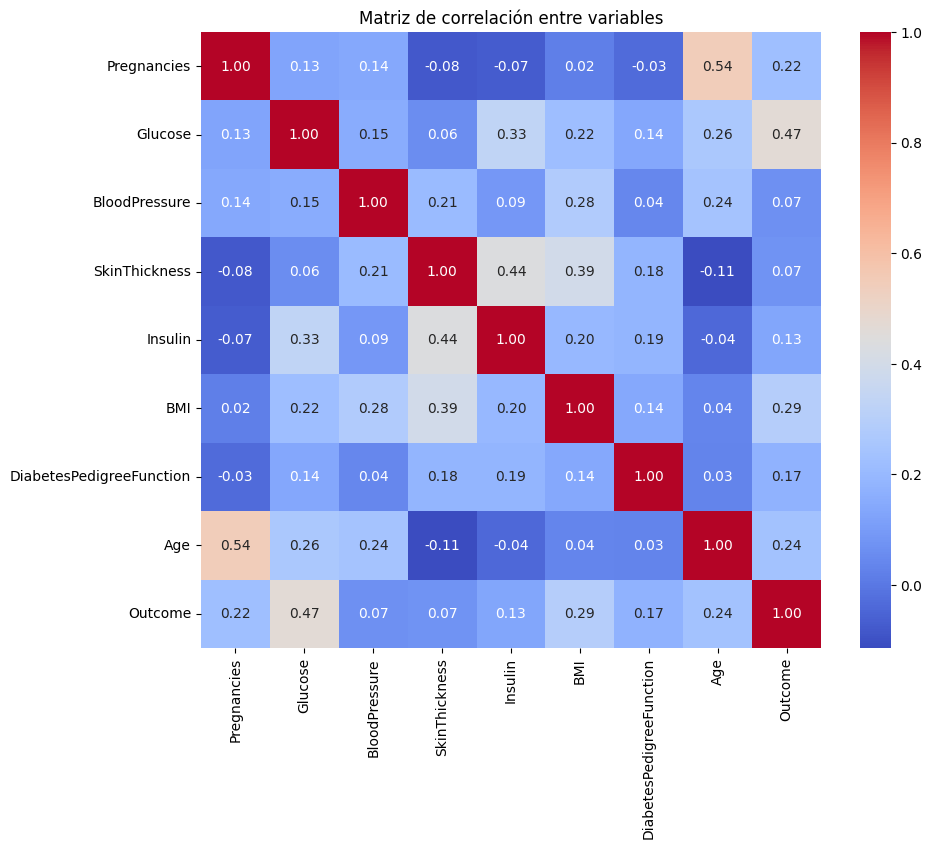

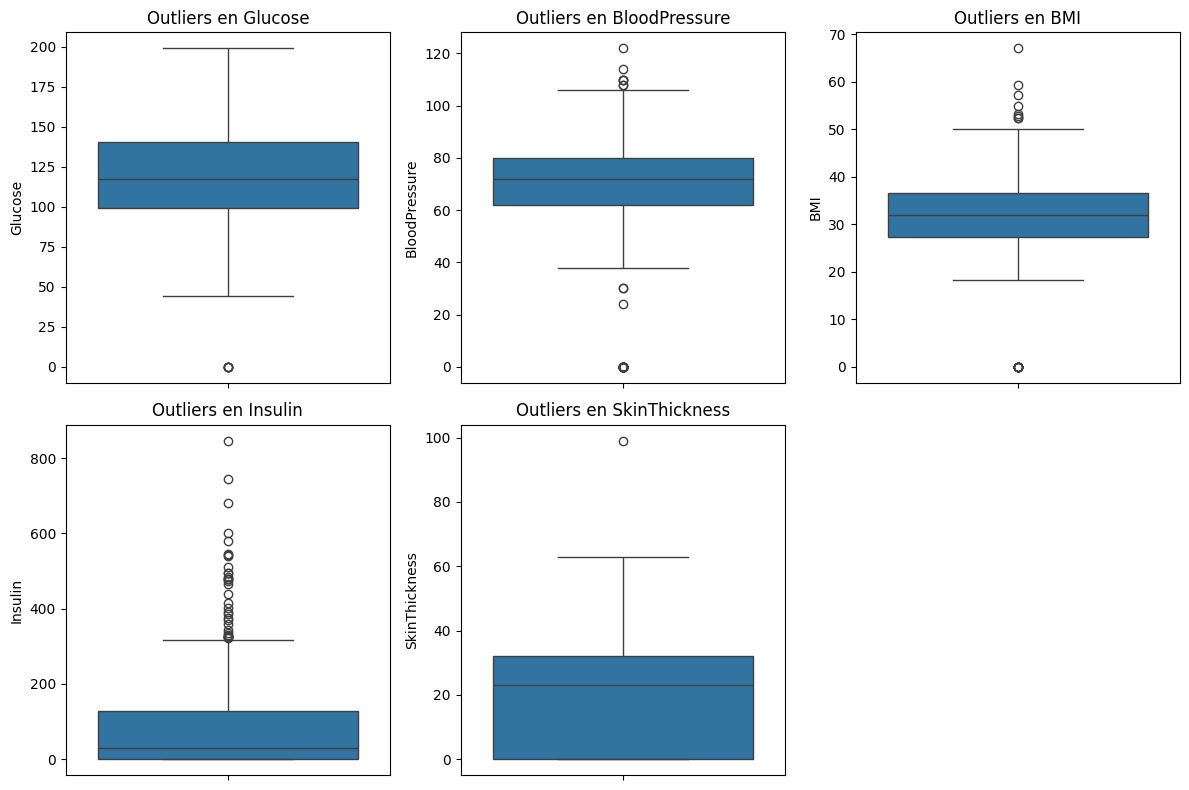

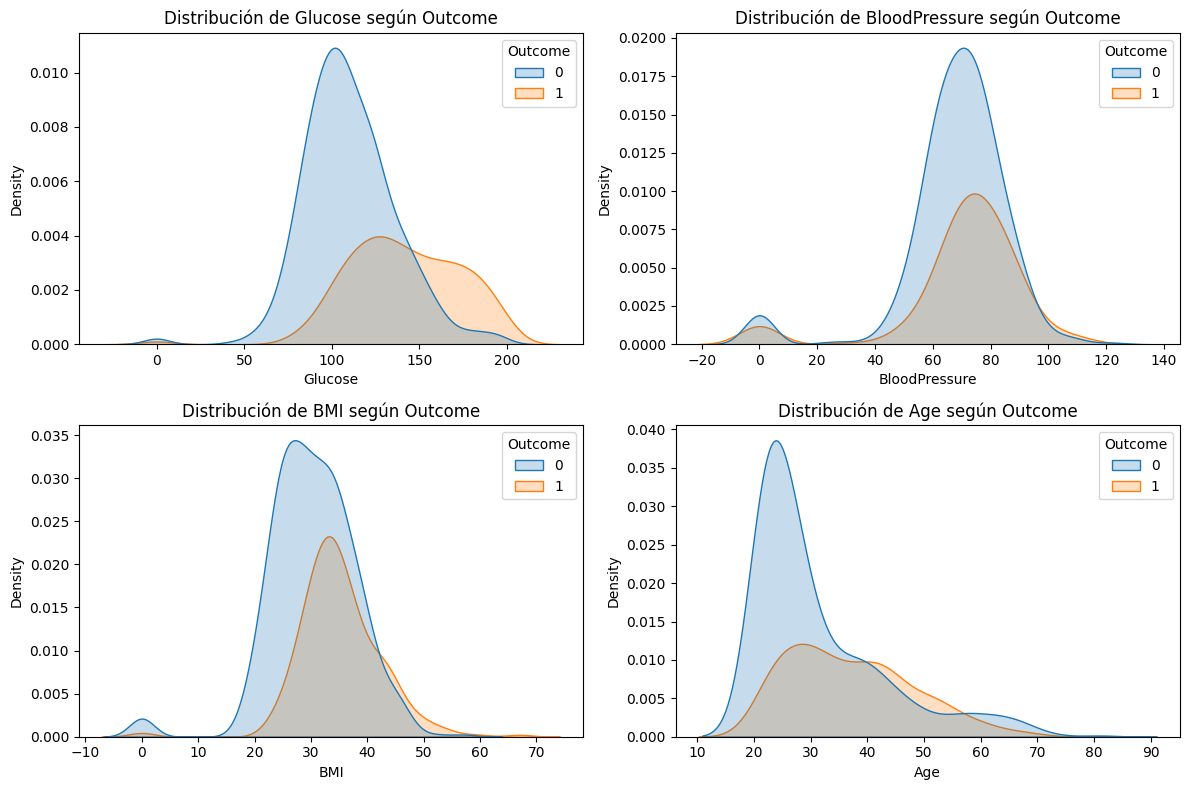


**Conclusiones iniciales:**
- Filas: 768 — Columnas: 9.
- La clase `Outcome` está desbalanceada (más 'No Diabetes' que 'Diabetes').
- Variables con mayor correlación aparente a Outcome: Glucose, BMI, Age.
- Existen outliers notables en Insulin y SkinThickness; considerar imputación o truncado.
- Recomendación: Escalado de features y balanceo de clases (p.ej. SMOTE) antes del entrenamiento.


In [8]:
# --- 1. Importar librerías ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Directorio actual:", os.getcwd())
# Configuración visual
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams.update({'figure.max_open_warning': 0})

# --- 2. Cargar dataset ---
df = pd.read_csv("../data/diabetes.csv")
print("Dimensiones del dataset:", df.shape)
display(df.head())

# --- 3. Información general ---
print("\nInformación y tipos de datos:")
display(df.info())
print("\nValores nulos por columna:")
display(df.isnull().sum())

# --- 4. Estadísticas descriptivas ---
print("\nEstadísticas básicas:")
display(df.describe())

# --- 5. Distribución de la variable objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la variable objetivo (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Frecuencia')
plt.show()

# --- 6. Histogramas de variables numéricas ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Distribución de variables numéricas")
plt.show()

# --- 7. Matriz de correlación ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# --- 8. Boxplots para detectar outliers en columnas seleccionadas ---
cols_to_box = ["Glucose", "BloodPressure", "BMI", "Insulin", "SkinThickness"]
plt.figure(figsize=(12,8))
for i, col in enumerate(cols_to_box):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Outliers en {col}")
plt.tight_layout()
plt.show()

# --- 9. KDE: comparación por Outcome para variables clave ---
cmp_cols = ["Glucose", "BloodPressure", "BMI", "Age"]
plt.figure(figsize=(12,8))
for i, col in enumerate(cmp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df, x=col, hue="Outcome", fill=True)
    plt.title(f"Distribución de {col} según Outcome")
plt.tight_layout()
plt.show()

# --- 10. Conclusiones preliminares ---
from IPython.display import Markdown, display
conclusions = f"""
**Conclusiones iniciales:**
- Filas: {df.shape[0]} — Columnas: {df.shape[1]}.
- La clase `Outcome` está desbalanceada (más 'No Diabetes' que 'Diabetes').
- Variables con mayor correlación aparente a Outcome: Glucose, BMI, Age.
- Existen outliers notables en Insulin y SkinThickness; considerar imputación o truncado.
- Recomendación: Escalado de features y balanceo de clases (p.ej. SMOTE) antes del entrenamiento.
"""
display(Markdown(conclusions))
